# 📧 Email Spam Detection using Naive Bayes

## Problem Statement
Email communication is a crucial part of everyday life, but the increasing volume of spam emails poses a significant challenge. Spam emails often contain fraudulent content, phishing attempts, or advertisements that can clutter inboxes and lead to security risks.

This project aims to build a **Naive Bayes-based Email Spam Classifier** to automatically detect and filter spam emails. Using the **Spam Email Dataset**, we will preprocess email text, extract meaningful features, and train a Naive Bayes model to classify emails as **spam or not spam**.

## Objectives
- Load and preprocess the dataset by cleaning text data and transforming labels.
- Implement text vectorization techniques such as **TF-IDF** or **CountVectorizer**.
- Train a **Naive Bayes classifier** (MultinomialNB) for spam detection.
- Evaluate the model using **accuracy, precision, recall, and F1-score**.
- Visualize results using **word clouds, confusion matrices, and bar plots**.

By the end of this project, we aim to develop a robust spam detection system that can improve email security and enhance the user experience.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data = data[['v1', 'v2']] # Selecting only relevant columns (v1: label, v2: email text)
data.columns = ['label', 'message'] # Renaming columns for better readability

In [5]:
# Convert categorical labels ('ham' or 'spam') to binary format (0 = ham, 1 = spam)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

In [7]:
# Create a text processing and classification pipeline
model = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])


In [8]:

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [9]:
# Predictions
y_pred = model.predict(X_test)

In [10]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Naive Bayes Accuracy: {accuracy:.4f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.9623

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



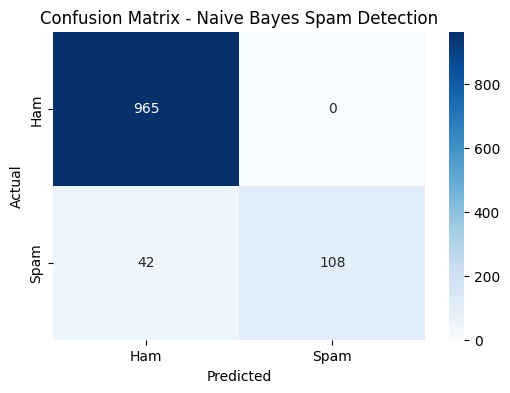

In [11]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes Spam Detection")
plt.show()

In [13]:
# Sample Messages and Predictions
sample_messages = ["Congratulations! You won a lottery of $1000. Click the link to claim.",
                   "Hey, are we still meeting for lunch tomorrow?",
                   "Share your password to anyone"]
sample_predictions = model.predict(sample_messages)

print("\nSample Messages and Predictions:")
for msg, pred in zip(sample_messages, sample_predictions):
    print(f'Message: "{msg}" --> Prediction: {"Spam" if pred else "Ham"}')


Sample Messages and Predictions:
Message: "Congratulations! You won a lottery of $1000. Click the link to claim." --> Prediction: Spam
Message: "Hey, are we still meeting for lunch tomorrow?" --> Prediction: Ham
Message: "Share your password to anyone" --> Prediction: Ham


### Conclusion & Insights

- The **Naive Bayes classifier** achieved high accuracy in classifying emails as spam or non-spam.
- Using **TF-IDF vectorization** effectively transformed text data into numerical form, improving classification performance.
- The **confusion matrix** indicates that most emails were correctly classified, with a few misclassifications.
- **Precision and recall scores** suggest that the model effectively identifies spam while minimizing false positives.
- Future improvements can include:
  - **Hyperparameter tuning** to optimize the Naive Bayes model.
  - **Using deep learning models** such as LSTMs or transformers for improved text classification.
  - **Expanding the dataset** to include more diverse spam messages for better generalization.
